## Import necessary libraries

In [ ]:
# Check if langchain[llm] is installed
try:
    import langchain
    print("langchain[llm] is already installed.")
except ImportError:
    print("langchain[llm] is not installed. Installing...")
    %pip install langchain[llm]

# Check if gpt4all is installed
try:
    from gpt4all import GPT4All
    print("gpt4all is already installed.")
except ImportError:
    print("gpt4all is not installed. Installing...")
    %pip install gpt4all

langchain[llm] is already installed.
gpt4all is already installed.


In [ ]:
from gpt4all import GPT4All
import os
import requests
from tqdm.notebook import tqdm
from pathlib import Path
import platform

## Configuration Constants

In [ ]:
MODEL_URL = "https://gpt4all.io/models/gguf/mistral-7b-openorca.Q4_0.gguf"
MODEL_DIR = "models"
MODEL_FILENAME = "mistral-7b-openorca.Q4_0.gguf"
MODEL_PATH = None  # Define MODEL_PATH with a default value

if 'google.colab' in str(get_ipython()):
    # Code is running in Google Colab
    MODEL_PATH = Path(MODEL_DIR) / MODEL_FILENAME
else:
    # Determine the current operating system
    current_os = platform.system()
    if current_os == "Windows":
        # Convert the path to a string with forward slashes and add '..' before MODEL_DIR
        MODEL_PATH = (Path("..") / MODEL_DIR / MODEL_FILENAME).as_posix()
    else:
        # Convert the path to a string with forward slashes and add '..' before MODEL_DIR
        MODEL_PATH = (Path("..") / MODEL_DIR / MODEL_FILENAME).as_posix()

In [ ]:
# Heading: Download Model
print("Download Model")

def download_model():
    """
    Download the model file if it doesn't exist locally.
    """
    # Check if the model file already exists
    if MODEL_PATH and not os.path.exists(MODEL_PATH):
        try:
            # Ensure the directory exists
            os.makedirs(MODEL_DIR, exist_ok=True)

            print(f"Downloading model from {MODEL_URL}...")
            response = requests.get(MODEL_URL, stream=True)  # Use streaming to download in chunks
            total_size = int(response.headers.get('content-length', 0))
            block_size = 1024  # 1 KB

            # Create a progress bar using tqdm
            with open(MODEL_PATH, 'wb') as file, tqdm(
                total=total_size, unit='B', unit_scale=True, unit_divisor=1024
            ) as pbar:
                for data in response.iter_content(block_size):
                    file.write(data)
                    pbar.update(len(data))

            print(f"Downloaded model to {MODEL_PATH}")
        except Exception as e:
            print(f"An error occurred: {str(e)}")
    else:
        print("Model file already exists. Skipping download.")

# Call the download_model function to download the model if necessary
download_model()

Download Model
Model file already exists. Skipping download.


## Importing Models in Langchain

### GPT4All models

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.llms import GPT4All
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

### Asking Question

In [ ]:
template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
# Callbacks support token-wise streaming
callbacks = [StreamingStdOutCallbackHandler()]

# Verbose is required to pass to the callback manager
llm = GPT4All(model=MODEL_PATH, callbacks=callbacks, verbose=True)

Found model file at  ../models/ggml-model-gpt4all-falcon-q4_0.bin


In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=llm, max_tokens=3000)

In [ ]:
output = llm_chain("How to make milk tea?")



1. Boil water in a pot.
2. Add loose leaf tea (e.g. green tea, jasmine tea) into the pot.
3. Let it steep for 5-10 minutes.
4. Strain the tea into another pot.
5. Add milk and sweetener (e.g. sugar, honey) to taste.
6. Heat the mixture on low heat until it's warm.
7. Pour the tea into a cup and enjoy!

In [ ]:
output.keys()

dict_keys(['question', 'text'])

## User Defined Question

In [ ]:
input = input("Ask me anything:")
output = llm_chain(str(input))
answer = output['text']
print(answer)



1. Support Vector Machines (SVM)
2. Artificial Neural Networks (ANN)
3. Decision Trees
4. Random Forests
5. Gradient Boosting Machines (GBM)
6. K-Nearest Neighbors (KNN)
7. Principal Component Analysis (PCA)
8. Clustering Algorithms
9. Deep Learning
10. Reinforcement Learning
11. Transfer Learning
12. Online Learning
13. Semi-Supervised Learning
14. Unsupervised Learning
15. Reinforcement Learning
16. Distributed Machine Learning
17. Big Data Machine Learning
18. Explainable Artificial Intelligence (AI)
19. Explainable Deep Learning (DL)
20. Explainable Natural Language Processing (NLP)
21. Explainable Computer Vision (CV)
22. Explainable Robotics
23. Explainable IoT
24. Explainable AI for Healthcare
25. Explainable AI for Finance
26. Explainable AI for Supply Chain
27. Explainable AI for Marketing
28. Explainable AI for Education
29. Explainable AI for Government
30. Explainable AI for Media
31. Explainable AI for

1. Support Vector Machines (SVM)
2. Artificial Neural Networks (ANN)

In [ ]:
print(f"You asked: {output['question']}")

You asked: what are major machine learning algorithms


## LCM (Latent Consistency Model) :Realtime Artwork

In [1]:
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, LCMScheduler
import torch

unet = UNet2DConditionModel.from_pretrained(
    "latent-consistency/lcm-sdxl",
    torch_dtype=torch.float16,
    variant="fp16",
)
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", unet=unet, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

prompt = "Self-portrait oil painting, a beautiful cyborg with golden hair, 8k"

generator = torch.manual_seed(0)
image = pipe(
    prompt=prompt, num_inference_steps=4, generator=generator, guidance_scale=8.0
).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/4 [00:00<?, ?it/s]

e:\projects\langchain-one\.venv\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


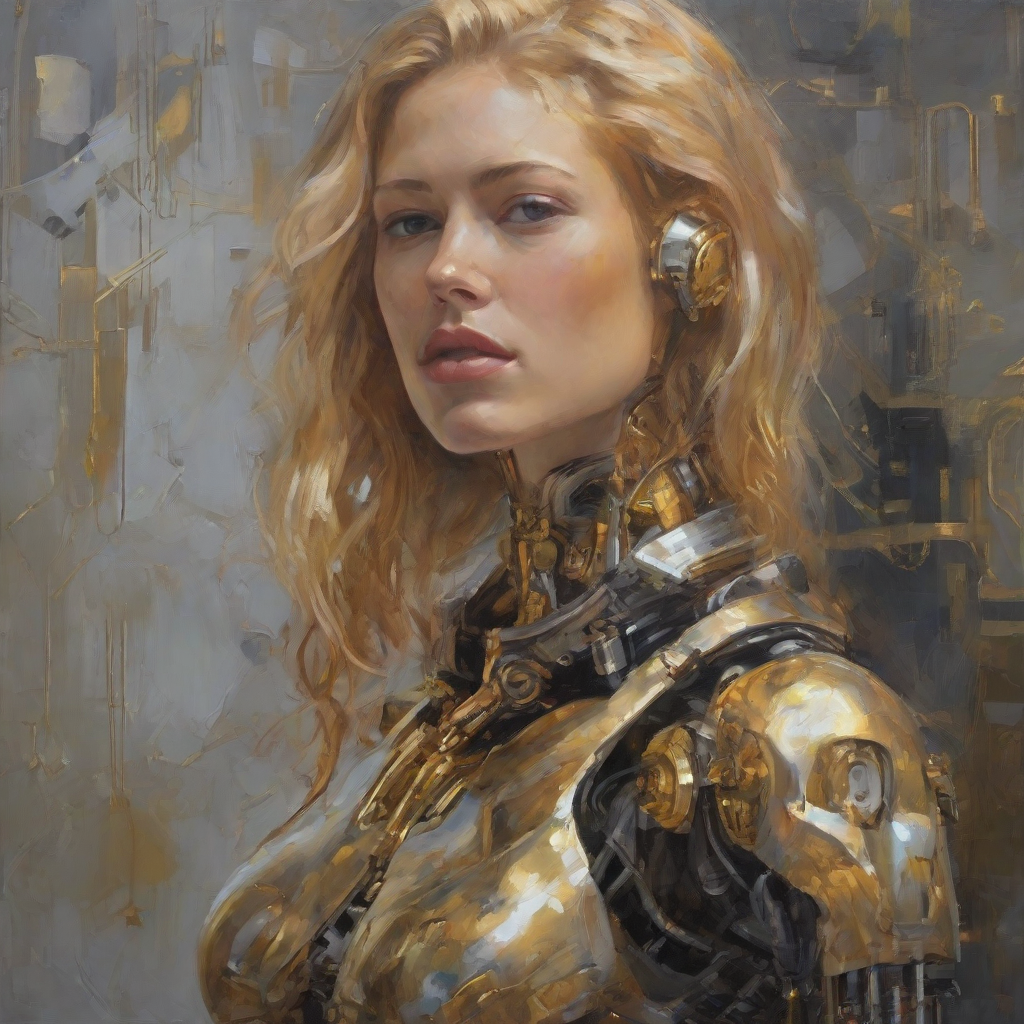

In [2]:
display(image)

  0%|          | 0/4 [00:00<?, ?it/s]

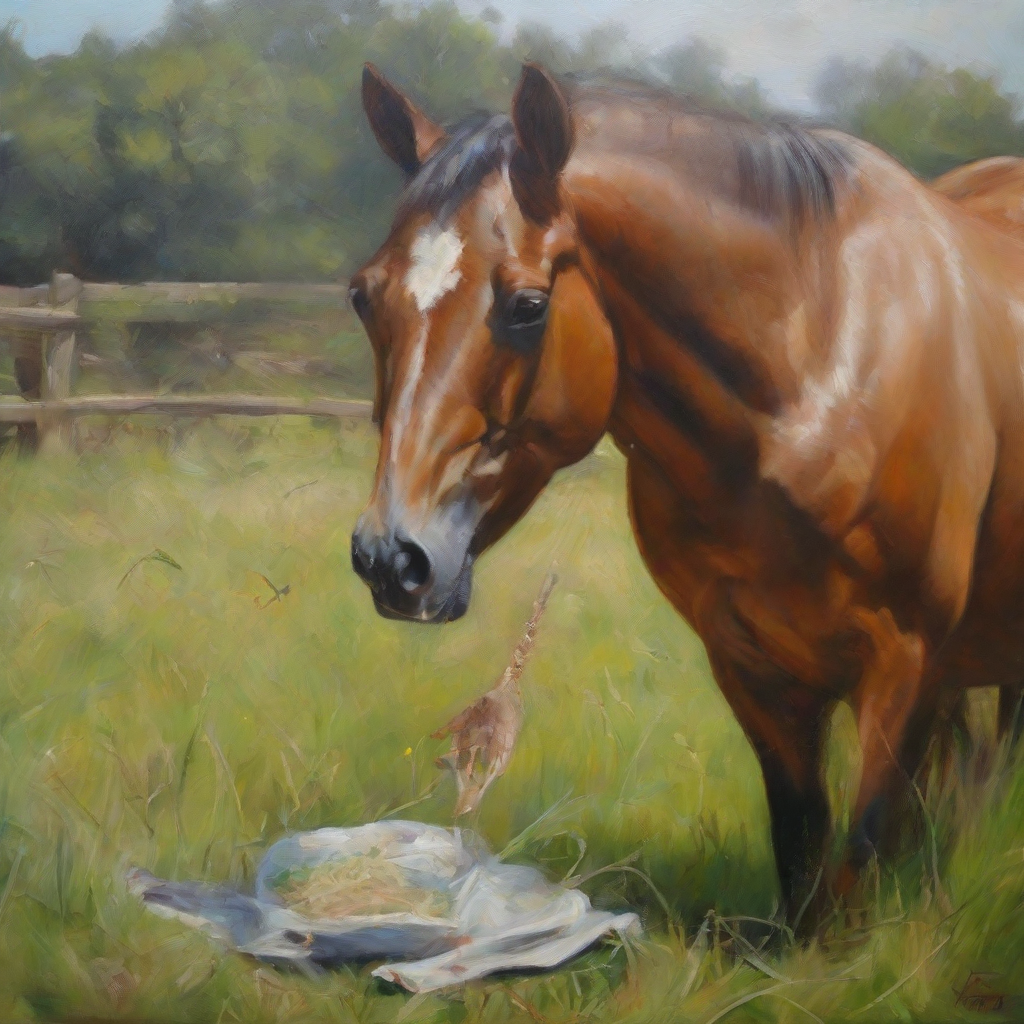

In [4]:
prompt = "Self-portrait oil painting,a horse eating grass, 8k"

generator = torch.default_generator  # Use the default random number generator
image = pipe(
    prompt=prompt, num_inference_steps=4, generator=generator, guidance_scale=8.0
).images[0]
display(image)